In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sliding_puzzle import PDB, load_pdb, SlidingBoard

In [4]:
p = load_pdb("./15_puzzle_1_2_3_4_5_6_7_addidtive_pdb.pkl")

In [6]:
p[SlidingBoard()]

0

In [5]:
import matplotlib.pyplot as plt

In [13]:
p.__to_id__(SlidingBoard())

19088743

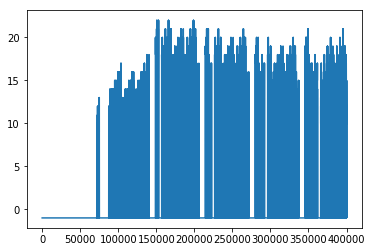

In [20]:
plt.plot(p.table[19000000:19400000])
plt.show()
# There are iregular length -1 seg in PDB


In [7]:
a = {1:2, 3:2}
1 in [l[1] for l in a.items()]

False

In [44]:
import copy
from heapq import heappush, heappop
import numpy as np
import math
import random

In [53]:
class Pattern:
    def __init__(self, L=4, pattern=[1,2,3], pos=None, blank=None):
        self.L = L
        if pos is not None:
            self.pos = pos
        else:
            self.pos = dict((i, (int(i / L), i % L)) for i in pattern)
        if blank is None:
            self.blank = (0, 0)
            assert self.blank not in [l[1] for l in self.pos.items()]
        else:
            self.blank = blank

    def get_children(self):
        incrs = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        children = []
        filled = dict([(k[1], k[0]) for k in self.pos.items()])

        (i, j) = self.blank
        moves = [(i + incr[0], j + incr[1])
                 for incr in incrs if
                 0 <= i + incr[0] < self.L and
                 0 <= j + incr[1] < self.L]
        for move in moves:
            new_blank = move
            new_pos = copy.deepcopy(self.pos)
            cost = 0
            
            if new_blank in filled:
                new_pos[filled[new_blank]] = self.blank
                cost = 1
            
            children.append((cost, Pattern(pos=new_pos, blank = new_blank)))
            
        return children

    def __repr__(self):
        board = [[0 for j in range(self.L)]for i in range(self.L)]
        for k in self.pos:
            val = self.pos[k]
            board[val[0]][val[1]] = k
        return '\n' + '\n'.join([str(l) for l in board]) + '\n'

    def __hash__(self):
        return hash((self.blank, tuple(self.pos.items())))

    def __eq__(self, other):
        try:
            return self.pos == other.pos and self.blank == other.blank
        except:
            return False

    def __lt__(self, other):
        # implement less than just to make Pattern able to fit in a Heap
        return random.choice([True, False])

In [46]:
p = Pattern()
for i in p.get_children()[1][1].get_children():
    print(i)

(0, 
[0, 1, 2, 3]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
)
(0, 
[0, 1, 2, 3]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
)
(0, 
[0, 1, 2, 3]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
)


In [92]:
class PDB:
    
    UNFILLED = 0
    
    def __init__(self, L=4, pattern=[1,2,3]):
        self.L = L
        self.pattern = tuple(pattern)
        self.table = np.zeros((L**2) ** (len(pattern) + 1), dtype="uint8")
        self.name = f"{L**2 - 1}_puzzle_{'_'.join(map(str,pattern))}_addidtive_pdb"

    def __to_id__(self, pat: Pattern):
        idx = 0
        for i in self.pattern:
            idx = idx * (self.L ** 2) + pat.pos[i][0] * self.L + pat.pos[i][1]
        idx = idx * (self.L ** 2) + pat.blank[0] * self.L + pat.blank[1]
        return idx

    def __getitem__(self, x):
        assert isinstance(x, Pattern)
        return self.table[self.__to_id__(x)] - 1

    def save(self, filename=None):
        if filename is None:
            filename = self.name + ".pkl"

        pickle.dump(self, open(filename, "wb"))

    def bfs(self):
        total_cnt = math.factorial(self.L ** 2) / math.factorial(self.L ** 2 - len(self.pattern) - 1)
        step = int(total_cnt / 10000) + 1
        cnt = 1
        print(f"totoal: {total_cnt}")
        dij_q = []
        start = Pattern(L=self.L, pattern=self.pattern)
        heappush(dij_q, (1, start))
        self.table[self.__to_id__(start)] = 1
        while dij_q:
            dist, current = heappop(dij_q)
            for inc, child in current.get_children():
                if self.table[self.__to_id__(child)] == self.UNFILLED:
                    cnt += 1
                    if cnt % step == 0:
                        print(f"{cnt} / {total_cnt}")
                    self.table[self.__to_id__(child)] = dist + inc
                    
                    heappush(dij_q, (dist + inc, child))
        self.__compress__()
        self.table = self.compressed_table
    
    def __compress__(self):
        # compressing the blank
        L = self.L
        self.compressed_table = np.zeros((L**2) ** len(self.pattern), dtype="uint8")
        for i in range((L**2) ** len(self.pattern)):
            candidate = [l for l in self.table[(L**2) * i: (L**2) * (i + 1)] if l > 0]
            if candidate:
                self.compressed_table[i] = min(candidate)
            else:
                self.compressed_table[i] = 0
        

In [93]:
p = PDB()
p.bfs()

totoal: 43680.0
5 / 43680.0
10 / 43680.0
15 / 43680.0
20 / 43680.0
25 / 43680.0
30 / 43680.0
35 / 43680.0
40 / 43680.0
45 / 43680.0
50 / 43680.0
55 / 43680.0
60 / 43680.0
65 / 43680.0
70 / 43680.0
75 / 43680.0
80 / 43680.0
85 / 43680.0
90 / 43680.0
95 / 43680.0
100 / 43680.0
105 / 43680.0
110 / 43680.0
115 / 43680.0
120 / 43680.0
125 / 43680.0
130 / 43680.0
135 / 43680.0
140 / 43680.0
145 / 43680.0
150 / 43680.0
155 / 43680.0
160 / 43680.0
165 / 43680.0
170 / 43680.0
175 / 43680.0
180 / 43680.0
185 / 43680.0
190 / 43680.0
195 / 43680.0
200 / 43680.0
205 / 43680.0
210 / 43680.0
215 / 43680.0
220 / 43680.0
225 / 43680.0
230 / 43680.0
235 / 43680.0
240 / 43680.0
245 / 43680.0
250 / 43680.0
255 / 43680.0
260 / 43680.0
265 / 43680.0
270 / 43680.0
275 / 43680.0
280 / 43680.0
285 / 43680.0
290 / 43680.0
295 / 43680.0
300 / 43680.0
305 / 43680.0
310 / 43680.0
315 / 43680.0
320 / 43680.0
325 / 43680.0
330 / 43680.0
335 / 43680.0
340 / 43680.0
345 / 43680.0
350 / 43680.0
355 / 43680.0
360 / 4368

4595 / 43680.0
4600 / 43680.0
4605 / 43680.0
4610 / 43680.0
4615 / 43680.0
4620 / 43680.0
4625 / 43680.0
4630 / 43680.0
4635 / 43680.0
4640 / 43680.0
4645 / 43680.0
4650 / 43680.0
4655 / 43680.0
4660 / 43680.0
4665 / 43680.0
4670 / 43680.0
4675 / 43680.0
4680 / 43680.0
4685 / 43680.0
4690 / 43680.0
4695 / 43680.0
4700 / 43680.0
4705 / 43680.0
4710 / 43680.0
4715 / 43680.0
4720 / 43680.0
4725 / 43680.0
4730 / 43680.0
4735 / 43680.0
4740 / 43680.0
4745 / 43680.0
4750 / 43680.0
4755 / 43680.0
4760 / 43680.0
4765 / 43680.0
4770 / 43680.0
4775 / 43680.0
4780 / 43680.0
4785 / 43680.0
4790 / 43680.0
4795 / 43680.0
4800 / 43680.0
4805 / 43680.0
4810 / 43680.0
4815 / 43680.0
4820 / 43680.0
4825 / 43680.0
4830 / 43680.0
4835 / 43680.0
4840 / 43680.0
4845 / 43680.0
4850 / 43680.0
4855 / 43680.0
4860 / 43680.0
4865 / 43680.0
4870 / 43680.0
4875 / 43680.0
4880 / 43680.0
4885 / 43680.0
4890 / 43680.0
4895 / 43680.0
4900 / 43680.0
4905 / 43680.0
4910 / 43680.0
4915 / 43680.0
4920 / 43680.0
4925 / 436

7725 / 43680.0
7730 / 43680.0
7735 / 43680.0
7740 / 43680.0
7745 / 43680.0
7750 / 43680.0
7755 / 43680.0
7760 / 43680.0
7765 / 43680.0
7770 / 43680.0
7775 / 43680.0
7780 / 43680.0
7785 / 43680.0
7790 / 43680.0
7795 / 43680.0
7800 / 43680.0
7805 / 43680.0
7810 / 43680.0
7815 / 43680.0
7820 / 43680.0
7825 / 43680.0
7830 / 43680.0
7835 / 43680.0
7840 / 43680.0
7845 / 43680.0
7850 / 43680.0
7855 / 43680.0
7860 / 43680.0
7865 / 43680.0
7870 / 43680.0
7875 / 43680.0
7880 / 43680.0
7885 / 43680.0
7890 / 43680.0
7895 / 43680.0
7900 / 43680.0
7905 / 43680.0
7910 / 43680.0
7915 / 43680.0
7920 / 43680.0
7925 / 43680.0
7930 / 43680.0
7935 / 43680.0
7940 / 43680.0
7945 / 43680.0
7950 / 43680.0
7955 / 43680.0
7960 / 43680.0
7965 / 43680.0
7970 / 43680.0
7975 / 43680.0
7980 / 43680.0
7985 / 43680.0
7990 / 43680.0
7995 / 43680.0
8000 / 43680.0
8005 / 43680.0
8010 / 43680.0
8015 / 43680.0
8020 / 43680.0
8025 / 43680.0
8030 / 43680.0
8035 / 43680.0
8040 / 43680.0
8045 / 43680.0
8050 / 43680.0
8055 / 436

12565 / 43680.0
12570 / 43680.0
12575 / 43680.0
12580 / 43680.0
12585 / 43680.0
12590 / 43680.0
12595 / 43680.0
12600 / 43680.0
12605 / 43680.0
12610 / 43680.0
12615 / 43680.0
12620 / 43680.0
12625 / 43680.0
12630 / 43680.0
12635 / 43680.0
12640 / 43680.0
12645 / 43680.0
12650 / 43680.0
12655 / 43680.0
12660 / 43680.0
12665 / 43680.0
12670 / 43680.0
12675 / 43680.0
12680 / 43680.0
12685 / 43680.0
12690 / 43680.0
12695 / 43680.0
12700 / 43680.0
12705 / 43680.0
12710 / 43680.0
12715 / 43680.0
12720 / 43680.0
12725 / 43680.0
12730 / 43680.0
12735 / 43680.0
12740 / 43680.0
12745 / 43680.0
12750 / 43680.0
12755 / 43680.0
12760 / 43680.0
12765 / 43680.0
12770 / 43680.0
12775 / 43680.0
12780 / 43680.0
12785 / 43680.0
12790 / 43680.0
12795 / 43680.0
12800 / 43680.0
12805 / 43680.0
12810 / 43680.0
12815 / 43680.0
12820 / 43680.0
12825 / 43680.0
12830 / 43680.0
12835 / 43680.0
12840 / 43680.0
12845 / 43680.0
12850 / 43680.0
12855 / 43680.0
12860 / 43680.0
12865 / 43680.0
12870 / 43680.0
12875 / 

15210 / 43680.0
15215 / 43680.0
15220 / 43680.0
15225 / 43680.0
15230 / 43680.0
15235 / 43680.0
15240 / 43680.0
15245 / 43680.0
15250 / 43680.0
15255 / 43680.0
15260 / 43680.0
15265 / 43680.0
15270 / 43680.0
15275 / 43680.0
15280 / 43680.0
15285 / 43680.0
15290 / 43680.0
15295 / 43680.0
15300 / 43680.0
15305 / 43680.0
15310 / 43680.0
15315 / 43680.0
15320 / 43680.0
15325 / 43680.0
15330 / 43680.0
15335 / 43680.0
15340 / 43680.0
15345 / 43680.0
15350 / 43680.0
15355 / 43680.0
15360 / 43680.0
15365 / 43680.0
15370 / 43680.0
15375 / 43680.0
15380 / 43680.0
15385 / 43680.0
15390 / 43680.0
15395 / 43680.0
15400 / 43680.0
15405 / 43680.0
15410 / 43680.0
15415 / 43680.0
15420 / 43680.0
15425 / 43680.0
15430 / 43680.0
15435 / 43680.0
15440 / 43680.0
15445 / 43680.0
15450 / 43680.0
15455 / 43680.0
15460 / 43680.0
15465 / 43680.0
15470 / 43680.0
15475 / 43680.0
15480 / 43680.0
15485 / 43680.0
15490 / 43680.0
15495 / 43680.0
15500 / 43680.0
15505 / 43680.0
15510 / 43680.0
15515 / 43680.0
15520 / 

19685 / 43680.0
19690 / 43680.0
19695 / 43680.0
19700 / 43680.0
19705 / 43680.0
19710 / 43680.0
19715 / 43680.0
19720 / 43680.0
19725 / 43680.0
19730 / 43680.0
19735 / 43680.0
19740 / 43680.0
19745 / 43680.0
19750 / 43680.0
19755 / 43680.0
19760 / 43680.0
19765 / 43680.0
19770 / 43680.0
19775 / 43680.0
19780 / 43680.0
19785 / 43680.0
19790 / 43680.0
19795 / 43680.0
19800 / 43680.0
19805 / 43680.0
19810 / 43680.0
19815 / 43680.0
19820 / 43680.0
19825 / 43680.0
19830 / 43680.0
19835 / 43680.0
19840 / 43680.0
19845 / 43680.0
19850 / 43680.0
19855 / 43680.0
19860 / 43680.0
19865 / 43680.0
19870 / 43680.0
19875 / 43680.0
19880 / 43680.0
19885 / 43680.0
19890 / 43680.0
19895 / 43680.0
19900 / 43680.0
19905 / 43680.0
19910 / 43680.0
19915 / 43680.0
19920 / 43680.0
19925 / 43680.0
19930 / 43680.0
19935 / 43680.0
19940 / 43680.0
19945 / 43680.0
19950 / 43680.0
19955 / 43680.0
19960 / 43680.0
19965 / 43680.0
19970 / 43680.0
19975 / 43680.0
19980 / 43680.0
19985 / 43680.0
19990 / 43680.0
19995 / 

22310 / 43680.0
22315 / 43680.0
22320 / 43680.0
22325 / 43680.0
22330 / 43680.0
22335 / 43680.0
22340 / 43680.0
22345 / 43680.0
22350 / 43680.0
22355 / 43680.0
22360 / 43680.0
22365 / 43680.0
22370 / 43680.0
22375 / 43680.0
22380 / 43680.0
22385 / 43680.0
22390 / 43680.0
22395 / 43680.0
22400 / 43680.0
22405 / 43680.0
22410 / 43680.0
22415 / 43680.0
22420 / 43680.0
22425 / 43680.0
22430 / 43680.0
22435 / 43680.0
22440 / 43680.0
22445 / 43680.0
22450 / 43680.0
22455 / 43680.0
22460 / 43680.0
22465 / 43680.0
22470 / 43680.0
22475 / 43680.0
22480 / 43680.0
22485 / 43680.0
22490 / 43680.0
22495 / 43680.0
22500 / 43680.0
22505 / 43680.0
22510 / 43680.0
22515 / 43680.0
22520 / 43680.0
22525 / 43680.0
22530 / 43680.0
22535 / 43680.0
22540 / 43680.0
22545 / 43680.0
22550 / 43680.0
22555 / 43680.0
22560 / 43680.0
22565 / 43680.0
22570 / 43680.0
22575 / 43680.0
22580 / 43680.0
22585 / 43680.0
22590 / 43680.0
22595 / 43680.0
22600 / 43680.0
22605 / 43680.0
22610 / 43680.0
22615 / 43680.0
22620 / 

25155 / 43680.0
25160 / 43680.0
25165 / 43680.0
25170 / 43680.0
25175 / 43680.0
25180 / 43680.0
25185 / 43680.0
25190 / 43680.0
25195 / 43680.0
25200 / 43680.0
25205 / 43680.0
25210 / 43680.0
25215 / 43680.0
25220 / 43680.0
25225 / 43680.0
25230 / 43680.0
25235 / 43680.0
25240 / 43680.0
25245 / 43680.0
25250 / 43680.0
25255 / 43680.0
25260 / 43680.0
25265 / 43680.0
25270 / 43680.0
25275 / 43680.0
25280 / 43680.0
25285 / 43680.0
25290 / 43680.0
25295 / 43680.0
25300 / 43680.0
25305 / 43680.0
25310 / 43680.0
25315 / 43680.0
25320 / 43680.0
25325 / 43680.0
25330 / 43680.0
25335 / 43680.0
25340 / 43680.0
25345 / 43680.0
25350 / 43680.0
25355 / 43680.0
25360 / 43680.0
25365 / 43680.0
25370 / 43680.0
25375 / 43680.0
25380 / 43680.0
25385 / 43680.0
25390 / 43680.0
25395 / 43680.0
25400 / 43680.0
25405 / 43680.0
25410 / 43680.0
25415 / 43680.0
25420 / 43680.0
25425 / 43680.0
25430 / 43680.0
25435 / 43680.0
25440 / 43680.0
25445 / 43680.0
25450 / 43680.0
25455 / 43680.0
25460 / 43680.0
25465 / 

29465 / 43680.0
29470 / 43680.0
29475 / 43680.0
29480 / 43680.0
29485 / 43680.0
29490 / 43680.0
29495 / 43680.0
29500 / 43680.0
29505 / 43680.0
29510 / 43680.0
29515 / 43680.0
29520 / 43680.0
29525 / 43680.0
29530 / 43680.0
29535 / 43680.0
29540 / 43680.0
29545 / 43680.0
29550 / 43680.0
29555 / 43680.0
29560 / 43680.0
29565 / 43680.0
29570 / 43680.0
29575 / 43680.0
29580 / 43680.0
29585 / 43680.0
29590 / 43680.0
29595 / 43680.0
29600 / 43680.0
29605 / 43680.0
29610 / 43680.0
29615 / 43680.0
29620 / 43680.0
29625 / 43680.0
29630 / 43680.0
29635 / 43680.0
29640 / 43680.0
29645 / 43680.0
29650 / 43680.0
29655 / 43680.0
29660 / 43680.0
29665 / 43680.0
29670 / 43680.0
29675 / 43680.0
29680 / 43680.0
29685 / 43680.0
29690 / 43680.0
29695 / 43680.0
29700 / 43680.0
29705 / 43680.0
29710 / 43680.0
29715 / 43680.0
29720 / 43680.0
29725 / 43680.0
29730 / 43680.0
29735 / 43680.0
29740 / 43680.0
29745 / 43680.0
29750 / 43680.0
29755 / 43680.0
29760 / 43680.0
29765 / 43680.0
29770 / 43680.0
29775 / 

32245 / 43680.0
32250 / 43680.0
32255 / 43680.0
32260 / 43680.0
32265 / 43680.0
32270 / 43680.0
32275 / 43680.0
32280 / 43680.0
32285 / 43680.0
32290 / 43680.0
32295 / 43680.0
32300 / 43680.0
32305 / 43680.0
32310 / 43680.0
32315 / 43680.0
32320 / 43680.0
32325 / 43680.0
32330 / 43680.0
32335 / 43680.0
32340 / 43680.0
32345 / 43680.0
32350 / 43680.0
32355 / 43680.0
32360 / 43680.0
32365 / 43680.0
32370 / 43680.0
32375 / 43680.0
32380 / 43680.0
32385 / 43680.0
32390 / 43680.0
32395 / 43680.0
32400 / 43680.0
32405 / 43680.0
32410 / 43680.0
32415 / 43680.0
32420 / 43680.0
32425 / 43680.0
32430 / 43680.0
32435 / 43680.0
32440 / 43680.0
32445 / 43680.0
32450 / 43680.0
32455 / 43680.0
32460 / 43680.0
32465 / 43680.0
32470 / 43680.0
32475 / 43680.0
32480 / 43680.0
32485 / 43680.0
32490 / 43680.0
32495 / 43680.0
32500 / 43680.0
32505 / 43680.0
32510 / 43680.0
32515 / 43680.0
32520 / 43680.0
32525 / 43680.0
32530 / 43680.0
32535 / 43680.0
32540 / 43680.0
32545 / 43680.0
32550 / 43680.0
32555 / 

35140 / 43680.0
35145 / 43680.0
35150 / 43680.0
35155 / 43680.0
35160 / 43680.0
35165 / 43680.0
35170 / 43680.0
35175 / 43680.0
35180 / 43680.0
35185 / 43680.0
35190 / 43680.0
35195 / 43680.0
35200 / 43680.0
35205 / 43680.0
35210 / 43680.0
35215 / 43680.0
35220 / 43680.0
35225 / 43680.0
35230 / 43680.0
35235 / 43680.0
35240 / 43680.0
35245 / 43680.0
35250 / 43680.0
35255 / 43680.0
35260 / 43680.0
35265 / 43680.0
35270 / 43680.0
35275 / 43680.0
35280 / 43680.0
35285 / 43680.0
35290 / 43680.0
35295 / 43680.0
35300 / 43680.0
35305 / 43680.0
35310 / 43680.0
35315 / 43680.0
35320 / 43680.0
35325 / 43680.0
35330 / 43680.0
35335 / 43680.0
35340 / 43680.0
35345 / 43680.0
35350 / 43680.0
35355 / 43680.0
35360 / 43680.0
35365 / 43680.0
35370 / 43680.0
35375 / 43680.0
35380 / 43680.0
35385 / 43680.0
35390 / 43680.0
35395 / 43680.0
35400 / 43680.0
35405 / 43680.0
35410 / 43680.0
35415 / 43680.0
35420 / 43680.0
35425 / 43680.0
35430 / 43680.0
35435 / 43680.0
35440 / 43680.0
35445 / 43680.0
35450 / 

39485 / 43680.0
39490 / 43680.0
39495 / 43680.0
39500 / 43680.0
39505 / 43680.0
39510 / 43680.0
39515 / 43680.0
39520 / 43680.0
39525 / 43680.0
39530 / 43680.0
39535 / 43680.0
39540 / 43680.0
39545 / 43680.0
39550 / 43680.0
39555 / 43680.0
39560 / 43680.0
39565 / 43680.0
39570 / 43680.0
39575 / 43680.0
39580 / 43680.0
39585 / 43680.0
39590 / 43680.0
39595 / 43680.0
39600 / 43680.0
39605 / 43680.0
39610 / 43680.0
39615 / 43680.0
39620 / 43680.0
39625 / 43680.0
39630 / 43680.0
39635 / 43680.0
39640 / 43680.0
39645 / 43680.0
39650 / 43680.0
39655 / 43680.0
39660 / 43680.0
39665 / 43680.0
39670 / 43680.0
39675 / 43680.0
39680 / 43680.0
39685 / 43680.0
39690 / 43680.0
39695 / 43680.0
39700 / 43680.0
39705 / 43680.0
39710 / 43680.0
39715 / 43680.0
39720 / 43680.0
39725 / 43680.0
39730 / 43680.0
39735 / 43680.0
39740 / 43680.0
39745 / 43680.0
39750 / 43680.0
39755 / 43680.0
39760 / 43680.0
39765 / 43680.0
39770 / 43680.0
39775 / 43680.0
39780 / 43680.0
39785 / 43680.0
39790 / 43680.0
39795 / 

42640 / 43680.0
42645 / 43680.0
42650 / 43680.0
42655 / 43680.0
42660 / 43680.0
42665 / 43680.0
42670 / 43680.0
42675 / 43680.0
42680 / 43680.0
42685 / 43680.0
42690 / 43680.0
42695 / 43680.0
42700 / 43680.0
42705 / 43680.0
42710 / 43680.0
42715 / 43680.0
42720 / 43680.0
42725 / 43680.0
42730 / 43680.0
42735 / 43680.0
42740 / 43680.0
42745 / 43680.0
42750 / 43680.0
42755 / 43680.0
42760 / 43680.0
42765 / 43680.0
42770 / 43680.0
42775 / 43680.0
42780 / 43680.0
42785 / 43680.0
42790 / 43680.0
42795 / 43680.0
42800 / 43680.0
42805 / 43680.0
42810 / 43680.0
42815 / 43680.0
42820 / 43680.0
42825 / 43680.0
42830 / 43680.0
42835 / 43680.0
42840 / 43680.0
42845 / 43680.0
42850 / 43680.0
42855 / 43680.0
42860 / 43680.0
42865 / 43680.0
42870 / 43680.0
42875 / 43680.0
42880 / 43680.0
42885 / 43680.0
42890 / 43680.0
42895 / 43680.0
42900 / 43680.0
42905 / 43680.0
42910 / 43680.0
42915 / 43680.0
42920 / 43680.0
42925 / 43680.0
42930 / 43680.0
42935 / 43680.0
42940 / 43680.0
42945 / 43680.0
42950 / 

In [94]:
p.__compress__()

In [98]:
p.compressed_table[100:120]

array([7, 6, 0, 4, 8, 7, 6, 5, 9, 8, 7, 6, 0, 6, 5, 4, 8, 7, 6, 0],
      dtype=uint8)

In [89]:
from sliding_puzzle import PDB as PDB_old

In [90]:
p_old = PDB_old()

In [91]:
p_old.bfs()

totoal: 3360.0
2 / 3360.0
3 / 3360.0
4 / 3360.0
5 / 3360.0
6 / 3360.0
7 / 3360.0
8 / 3360.0
9 / 3360.0
10 / 3360.0
11 / 3360.0
12 / 3360.0
13 / 3360.0
14 / 3360.0
15 / 3360.0
16 / 3360.0
17 / 3360.0
18 / 3360.0
19 / 3360.0
20 / 3360.0
21 / 3360.0
22 / 3360.0
23 / 3360.0
24 / 3360.0
25 / 3360.0
26 / 3360.0
27 / 3360.0
28 / 3360.0
29 / 3360.0
30 / 3360.0
31 / 3360.0
32 / 3360.0
33 / 3360.0
34 / 3360.0
35 / 3360.0
36 / 3360.0
37 / 3360.0
38 / 3360.0
39 / 3360.0
40 / 3360.0
41 / 3360.0
42 / 3360.0
43 / 3360.0
44 / 3360.0
45 / 3360.0
46 / 3360.0
47 / 3360.0
48 / 3360.0
49 / 3360.0
50 / 3360.0
51 / 3360.0
52 / 3360.0
53 / 3360.0
54 / 3360.0
55 / 3360.0
56 / 3360.0
57 / 3360.0
58 / 3360.0
59 / 3360.0
60 / 3360.0
61 / 3360.0
62 / 3360.0
63 / 3360.0
64 / 3360.0
65 / 3360.0
66 / 3360.0
67 / 3360.0
68 / 3360.0
69 / 3360.0
70 / 3360.0
71 / 3360.0
72 / 3360.0
73 / 3360.0
74 / 3360.0
75 / 3360.0
76 / 3360.0
77 / 3360.0
78 / 3360.0
79 / 3360.0
80 / 3360.0
81 / 3360.0
82 / 3360.0
83 / 3360.0
84 / 3360

859 / 3360.0
860 / 3360.0
861 / 3360.0
862 / 3360.0
863 / 3360.0
864 / 3360.0
865 / 3360.0
866 / 3360.0
867 / 3360.0
868 / 3360.0
869 / 3360.0
870 / 3360.0
871 / 3360.0
872 / 3360.0
873 / 3360.0
874 / 3360.0
875 / 3360.0
876 / 3360.0
877 / 3360.0
878 / 3360.0
879 / 3360.0
880 / 3360.0
881 / 3360.0
882 / 3360.0
883 / 3360.0
884 / 3360.0
885 / 3360.0
886 / 3360.0
887 / 3360.0
888 / 3360.0
889 / 3360.0
890 / 3360.0
891 / 3360.0
892 / 3360.0
893 / 3360.0
894 / 3360.0
895 / 3360.0
896 / 3360.0
897 / 3360.0
898 / 3360.0
899 / 3360.0
900 / 3360.0
901 / 3360.0
902 / 3360.0
903 / 3360.0
904 / 3360.0
905 / 3360.0
906 / 3360.0
907 / 3360.0
908 / 3360.0
909 / 3360.0
910 / 3360.0
911 / 3360.0
912 / 3360.0
913 / 3360.0
914 / 3360.0
915 / 3360.0
916 / 3360.0
917 / 3360.0
918 / 3360.0
919 / 3360.0
920 / 3360.0
921 / 3360.0
922 / 3360.0
923 / 3360.0
924 / 3360.0
925 / 3360.0
926 / 3360.0
927 / 3360.0
928 / 3360.0
929 / 3360.0
930 / 3360.0
931 / 3360.0
932 / 3360.0
933 / 3360.0
934 / 3360.0
935 / 3360.0

1921 / 3360.0
1922 / 3360.0
1923 / 3360.0
1924 / 3360.0
1925 / 3360.0
1926 / 3360.0
1927 / 3360.0
1928 / 3360.0
1929 / 3360.0
1930 / 3360.0
1931 / 3360.0
1932 / 3360.0
1933 / 3360.0
1934 / 3360.0
1935 / 3360.0
1936 / 3360.0
1937 / 3360.0
1938 / 3360.0
1939 / 3360.0
1940 / 3360.0
1941 / 3360.0
1942 / 3360.0
1943 / 3360.0
1944 / 3360.0
1945 / 3360.0
1946 / 3360.0
1947 / 3360.0
1948 / 3360.0
1949 / 3360.0
1950 / 3360.0
1951 / 3360.0
1952 / 3360.0
1953 / 3360.0
1954 / 3360.0
1955 / 3360.0
1956 / 3360.0
1957 / 3360.0
1958 / 3360.0
1959 / 3360.0
1960 / 3360.0
1961 / 3360.0
1962 / 3360.0
1963 / 3360.0
1964 / 3360.0
1965 / 3360.0
1966 / 3360.0
1967 / 3360.0
1968 / 3360.0
1969 / 3360.0
1970 / 3360.0
1971 / 3360.0
1972 / 3360.0
1973 / 3360.0
1974 / 3360.0
1975 / 3360.0
1976 / 3360.0
1977 / 3360.0
1978 / 3360.0
1979 / 3360.0
1980 / 3360.0
1981 / 3360.0
1982 / 3360.0
1983 / 3360.0
1984 / 3360.0
1985 / 3360.0
1986 / 3360.0
1987 / 3360.0
1988 / 3360.0
1989 / 3360.0
1990 / 3360.0
1991 / 3360.0
1992 /

2920 / 3360.0
2921 / 3360.0
2922 / 3360.0
2923 / 3360.0
2924 / 3360.0
2925 / 3360.0
2926 / 3360.0
2927 / 3360.0
2928 / 3360.0
2929 / 3360.0
2930 / 3360.0
2931 / 3360.0
2932 / 3360.0
2933 / 3360.0
2934 / 3360.0
2935 / 3360.0
2936 / 3360.0
2937 / 3360.0
2938 / 3360.0
2939 / 3360.0
2940 / 3360.0
2941 / 3360.0
2942 / 3360.0
2943 / 3360.0
2944 / 3360.0
2945 / 3360.0
2946 / 3360.0
2947 / 3360.0
2948 / 3360.0
2949 / 3360.0
2950 / 3360.0
2951 / 3360.0
2952 / 3360.0
2953 / 3360.0
2954 / 3360.0
2955 / 3360.0
2956 / 3360.0
2957 / 3360.0
2958 / 3360.0
2959 / 3360.0
2960 / 3360.0
2961 / 3360.0
2962 / 3360.0
2963 / 3360.0
2964 / 3360.0
2965 / 3360.0
2966 / 3360.0
2967 / 3360.0
2968 / 3360.0
2969 / 3360.0
2970 / 3360.0
2971 / 3360.0
2972 / 3360.0
2973 / 3360.0
2974 / 3360.0
2975 / 3360.0
2976 / 3360.0
2977 / 3360.0
2978 / 3360.0
2979 / 3360.0
2980 / 3360.0
2981 / 3360.0
2982 / 3360.0
2983 / 3360.0
2984 / 3360.0
2985 / 3360.0
2986 / 3360.0
2987 / 3360.0
2988 / 3360.0
2989 / 3360.0
2990 / 3360.0
2991 /

In [97]:
p_old.table[100:120]

array([7, 6, 0, 4, 8, 7, 6, 5, 9, 8, 7, 6, 0, 6, 5, 4, 8, 7, 6, 0],
      dtype=uint8)

In [103]:
sum(p.compressed_table)/len(p.compressed_table)

7.62158203125

In [104]:
sum(p_old.table)/len(p_old.table)

7.50244140625